# Which Countries Love America the Most?
In this project, we extract US favorability from the quotations provided in the QuoteBank dataset.
The steps are as follows:
1. Load the dataset chunk by chunk and apply a keyword filter
2. Drop quotes with "None" speakers
3. Add the nationality of speakers to the dataframe
4. Extract the sentiment of the quotes using a sentiment analysis library
5. Show US favorability for every country
6. Load PEW Research Center Dataset and describe it
7. Compare the datasets of PEW and QuoteSentiment


## 1. Load QuoteBank
In this section, we show how to load the data and apply a filter to extract the quotes with special keywords.
However, this step is done on **Google Colab** because the process is faster.
The output files are saved in the colab and downloaded to have them locally.

The following code is run on Google Colab:



import bz2
import json

keywords = ["US ", "U.S", "USA", "United States"]

for year in range(2015, 2021) :
  path_to_file = '/content/drive/MyDrive/us_data/Quotebank/quotes-'+year+'.json.bz2'
  path_to_out = '/content/drive/MyDrive/us_data/Filtered_data/quotes-'+year+'-us.json.bz2'
  with bz2.open(path_to_file, 'rb') as s_file:
      with bz2.open(path_to_out, 'wb') as d_file:
          for instance in s_file:
              instance = json.loads(instance) # loading a sample
              quote = instance['quotation'] # extracting list of links
              if any(word in quote for word in keywords) :
                d_file.write((json.dumps(instance)+'\n').encode('utf-8')) # writing in the new file

## 2. Load US-filtered data locally
In this part, we load the filtered data year by year and concatenate into a single dataframe.
However, since our goal is to categorize the quotations by their speaker's nationality, we need to ignore the quotes
whose speaker is "None".

In [1]:
import pandas as pd

# Get the index of None speaker quo
def drop_none_speaker(year, df):
    print("Year : {} with {} quotes".format(year, len(df)))
    drop_mask = df[df.speaker == "None"].index
    df_dropped = df.drop(drop_mask)
    print("{} quotes are removed".format(len(drop_mask)))
    return df_dropped

US_data = pd.DataFrame()
for year in [2015, 2016, 2019, 2020] :
    year_df = pd.read_json('input/quotes-{}-us.json.bz2'.format(year), lines=True, compression='bz2')
    year_df = drop_none_speaker(year, year_df)
    US_data = pd.concat([US_data, year_df], axis=0)

US_data.sample(n=10)



Year : 2015 with 190401 quotes
65755 quotes are removed
Year : 2016 with 135853 quotes
49131 quotes are removed
Year : 2019 with 255897 quotes
96480 quotes are removed
Year : 2020 with 60896 quotes
23040 quotes are removed


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
119822,2016-05-24-086688,That's up to him when he gets into the camp to...,Caleb Porter,[Q5019280],2016-05-24 17:30:06,1,"[[Caleb Porter, 0.5554], [Darlington Nagbe, 0....",[http://www.columbian.com/news/2016/may/24/tim...,E
128142,2016-12-23-063699,"Serious global and regional challenges, which ...",Vladimir Putin,[Q7747],2016-12-23 00:00:00,49,"[[Vladimir Putin, 0.5348], [None, 0.2709], [Do...",[http://www.businessinsider.com/trump-putin-ch...,E
87695,2016-08-03-122312,We must have a real open-sky policy. So if oth...,Maxime Bernier,[Q516940],2016-08-03 20:41:58,1,"[[Maxime Bernier, 0.7363], [None, 0.2637]]",[http://bnn.ca/scrap-foreign-ownership-rules-t...,E
81163,2019-11-26-069106,re-evaluation of the U.S. relationship with th...,Mike Pompeo,[Q473239],2019-11-26 12:29:00,2,"[[Mike Pompeo, 0.6551], [None, 0.3031], [Salva...",[https://www.thenigerianvoice.com/news/283204/...,E
114225,2015-11-30-116865,U.S. companies are getting increasingly high v...,Mark Tluszcz,[Q19664229],2015-11-30 02:51:57,3,"[[Mark Tluszcz, 0.8501], [None, 0.1499]]",[http://www.bloomberg.com/news/articles/2015-1...,E
18888,2015-09-22-059906,"It's a bridge he's establishing, a bridge betw...",Thomas Wenski,[Q1720196],2015-09-22 08:00:00,1,"[[Thomas Wenski, 0.6647], [None, 0.2732], [Pop...",[http://www.kansascity.com/living/religion/art...,E
34246,2015-02-24-099142,We think US viewers will quickly become addict...,Scott Woodward,[Q7437544],2015-02-24 20:25:47,1,"[[Scott Woodward, 0.6927], [None, 0.3073]]",[http://broadcastingcable.com/thewire/ovation-...,E
165201,2015-04-24-043292,Our overnight US rates flows saw central bank ...,William O'Donnell,[Q27924957],2015-04-24 13:20:03,1,"[[William O'Donnell, 0.7099], [None, 0.2901]]",[http://www.fxstreet.com/news/forex-news/artic...,E
118239,2016-05-02-058689,next First Family of the United States.,Carly Fiorina,[Q256380],2016-05-02 11:58:43,1,"[[Carly Fiorina, 0.7416], [None, 0.1694], [Ted...",[http://www.inquisitr.com/3055605/carly-fiorin...,E
32244,2015-08-02-063816,We have seen many countries introduce their ow...,Zhang Jie,"[Q11067251, Q11068101, Q197201, Q197205, Q3666...",2015-08-02 11:27:31,1,"[[Zhang Jie, 0.9573], [None, 0.0427]]",[http://chinatopix.com/articles/60308/20150802...,E


## 3. Add nationality to the main df
In this part, we use the speaker attributes dataset provided on the project web page. We need only id and nationality of
 the speakers; therefore, we keep these two columns. Then, we map the speaker id in Quotebank to this library.

In [2]:
speaker_df = pd.read_parquet("input/speaker_attributes.parquet")
speaker_df = speaker_df[['id', 'nationality']]
speaker_df.head()


,id,nationality
0,Q23,"[Q161885, Q30]"
1,Q42,[Q145]
2,Q1868,[Q31]
3,Q207,[Q30]
4,Q297,[Q29]


In [3]:
US_data["speaker_id"] = US_data.qids.map(lambda x: x[0])

#join US_data with the corresponding speakers' attributes
US_merged = pd.merge(US_data, speaker_df, left_on=['speaker_id'], right_on=['id'], how='inner')
US_merged.sample(n=5)


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_id,id,nationality
230697,2019-01-24-066204,Meat judging programs and the ICMJ US industry...,Sarah Stewart,"[Q15452267, Q50003012, Q7422801]",2019-01-24 14:32:35,1,"[[Sarah Stewart, 0.931], [None, 0.0672], [Laur...",[https://www.beefcentral.com/news/aussies-rack...,E,Q15452267,Q15452267,[Q30]
204565,2015-11-18-027780,How do you make the pitch to U.S. senators?,Eric Isaacs,[Q5386778],2015-11-18 11:50:55,1,"[[Eric Isaacs, 0.5755], [None, 0.2564], [Nigel...",[http://hpherald.com/2015/11/18/u-of-c-celebra...,E,Q5386778,Q5386778,None
226494,2016-12-10-044236,"Similarly, the anti-intellectual streak in the...",Linda Darling-Hammond,[Q6551511],2016-12-10 14:52:07,1,"[[Linda Darling-Hammond, 0.8947], [None, 0.1053]]",[http://truth-out.org/news/item/38665-teacher-...,E,Q6551511,Q6551511,[Q30]
363374,2020-02-27-055280,Person-to-person spread of COVID-19 also has b...,Tedros Adhanom Ghebreyesus,[Q16196017],2020-02-27 00:22:07,1,"[[Tedros Adhanom Ghebreyesus, 0.7869], [None, ...",[https://www.thestreet.com/latest-news/coronav...,E,Q16196017,Q16196017,[Q115]
167,2020-04-11-027021,The United States will not turn a blind eye to...,Ed Markey,[Q1282411],2020-04-11 07:18:11,2,"[[Ed Markey, 0.7351], [None, 0.1555], [Jim Ris...",[https://www.asianjournal.com/usa/dateline-usa...,E,Q1282411,Q1282411,[Q30]


Now, we have the speaker's nationality. However the nationality is coded as Q_i where i is an integer.
To translate this id to the name of the country we use *Wikidata API* to create a dictionary of country ids and names.



In [4]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

#sparkql query to get the country name and their respective quids from wikidata
query = """#List of present-day countries and capital(s)
SELECT DISTINCT ?country ?countryLabel
WHERE
{
  ?country wdt:P31 wd:Q3624078 .

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
ORDER BY ?countryLabel"""

'''
query internet dataset:
endpoint_url (string): url of corresponding dataset
query (string): sparksql query
'''
def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

#Build a country dictionnary {quid, country name}
country_dict = {}
for result in results["results"]["bindings"]:
    country_id = result["country"]['value'].split('/')[-1]
    country_dict[country_id] = result["countryLabel"]['value']
country_dict

{'Q889': 'Afghanistan',
 'Q222': 'Albania',
 'Q262': 'Algeria',
 'Q228': 'Andorra',
 'Q916': 'Angola',
 'Q781': 'Antigua and Barbuda',
 'Q414': 'Argentina',
 'Q399': 'Armenia',
 'Q408': 'Australia',
 'Q40': 'Austria',
 'Q227': 'Azerbaijan',
 'Q398': 'Bahrain',
 'Q902': 'Bangladesh',
 'Q244': 'Barbados',
 'Q184': 'Belarus',
 'Q31': 'Belgium',
 'Q242': 'Belize',
 'Q962': 'Benin',
 'Q917': 'Bhutan',
 'Q750': 'Bolivia',
 'Q225': 'Bosnia and Herzegovina',
 'Q963': 'Botswana',
 'Q155': 'Brazil',
 'Q921': 'Brunei',
 'Q219': 'Bulgaria',
 'Q965': 'Burkina Faso',
 'Q967': 'Burundi',
 'Q424': 'Cambodia',
 'Q1009': 'Cameroon',
 'Q16': 'Canada',
 'Q1011': 'Cape Verde',
 'Q929': 'Central African Republic',
 'Q657': 'Chad',
 'Q298': 'Chile',
 'Q739': 'Colombia',
 'Q970': 'Comoros',
 'Q800': 'Costa Rica',
 'Q224': 'Croatia',
 'Q204920': 'Crown of Aragon',
 'Q241': 'Cuba',
 'Q229': 'Cyprus',
 'Q213': 'Czech Republic',
 'Q1008': "Côte d'Ivoire",
 'Q756617': 'Danish Realm',
 'Q974': 'Democratic Republic 

In [5]:
# Add nationality of speaker from the country dictionnary
US_with_nation = US_merged.explode('nationality')
US_with_nation.nationality = US_with_nation.nationality.map(country_dict)
US_with_nation.sample(n=5)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_id,id,nationality
90429,2019-06-17-053236,Keeping Congress Accountable: Term Limits In t...,Ted Cruz,[Q2036942],2019-06-17 16:10:11,3,"[[Ted Cruz, 0.6155], [Jim DeMint, 0.2238], [No...",[https://thinkprogress.org/ted-cruz-six-gop-se...,E,Q2036942,Q2036942,United States of America
399170,2019-11-26-098722,USA Today and a couple of other publications h...,Glenn Smith,[Q49922885],2019-11-26 22:17:37,1,"[[Glenn Smith, 0.7707], [None, 0.2213], [Marcu...",[http://dallasnews.com/high-school-sports/bask...,E,Q49922885,Q49922885,NaN
62031,2015-03-18-020177,Given (Obama's) goal of abandoning the US alli...,Caroline Glick,[Q2898565],2015-03-18 09:22:27,2,"[[Caroline Glick, 0.8241], [None, 0.1617], [Be...",[http://canadafreepress.com/index.php/article/...,E,Q2898565,Q2898565,Israel
273204,2015-07-29-004400,"Against the U.S. in the final, we always look ...",Amanda Asay,[Q20675908],2015-07-29 04:33:28,1,"[[Amanda Asay, 0.729], [None, 0.2588], [Anna K...",[http://princegeorgecitizen.com/sports/pan-am-...,E,Q20675908,Q20675908,Canada
234364,2016-12-08-077620,No other grave site is as sacred in the United...,John Fuller,"[Q16018435, Q19957823, Q33140788, Q6234372, Q6...",2016-12-08 07:02:22,1,"[[John Fuller, 0.9151], [None, 0.0849]]",[http://www.dvidshub.net/news/216803/interment...,E,Q16018435,Q16018435,Australia


## 4. Get Sentiments
In this part, we get the sentiment of the quotes. We use a pre-trained library to extract the sentiment.
Any other libraries can be replaced here. In this milestone we used *nltk* because it is faster than other famous libraries.
For the next milestone, the library may be changed.

In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/alireza/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
sia = SentimentIntensityAnalyzer()
# predict the sentiment of each quotation in the range [-1, 1]
US_with_nation["sentiment"] = US_with_nation.quotation.apply(lambda x: sia.polarity_scores(x)["compound"])
US_with_nation.sample(n=5)


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_id,id,nationality,sentiment
153554,2019-12-18-030901,I solemnly and sadly open the debate on the im...,Nancy Pelosi,[Q170581],2019-12-18 00:00:00,46,"[[Nancy Pelosi, 0.6019], [None, 0.2648], [Doug...",[http://wnyt.com/politics/trump-on-brink-of-im...,E,Q170581,Q170581,United States of America,0.2023
181007,2015-10-23-045685,I will do my utmost to maintain the high stand...,Gregg Popovich,[Q456730],2015-10-23 16:44:32,1,"[[Gregg Popovich, 0.5357], [None, 0.3711], [Mi...",[http://olympics.nbcsports.com/2015/10/23/greg...,E,Q456730,Q456730,United States of America,0.5719
248953,2019-03-26-008937,As the United States wields sanctions more wid...,Stephen Kinzer,[Q1306701],2019-03-26 21:58:14,1,"[[Stephen Kinzer, 0.6816], [None, 0.266], [Jac...",[https://iranian.com/2019/03/26/europe-and-ira...,E,Q1306701,Q1306701,United States of America,0.7579
238340,2016-05-03-005807,And that's what they are doing now. They are p...,Kevin Barrett,"[Q18684584, Q36695487, Q6395786, Q6395787, Q63...",2016-05-03 14:10:53,1,"[[Kevin Barrett, 0.9405], [None, 0.0595]]",[http://www.veteranstoday.com/2016/05/03/911cia/],E,Q18684584,Q18684584,Canada,-0.3400
360676,2019-12-12-110373,While we understand from you that these aircra...,Andrea Thompson,"[Q273588, Q54965529]",2019-12-12 07:54:12,1,"[[Andrea Thompson, 0.6918], [None, 0.3082]]",[https://www.thestatesman.com/india/us-reprima...,E,Q273588,Q273588,United States of America,0.7351


## 5. Billion-Dollar Question: How much people love US?
In this part, we show the US favorability using the quotes. The sentiment average and the number of quotes for each country
is represented in the following figures.

<AxesSubplot:title={'center':'Number of quotes'}, ylabel='nationality'>

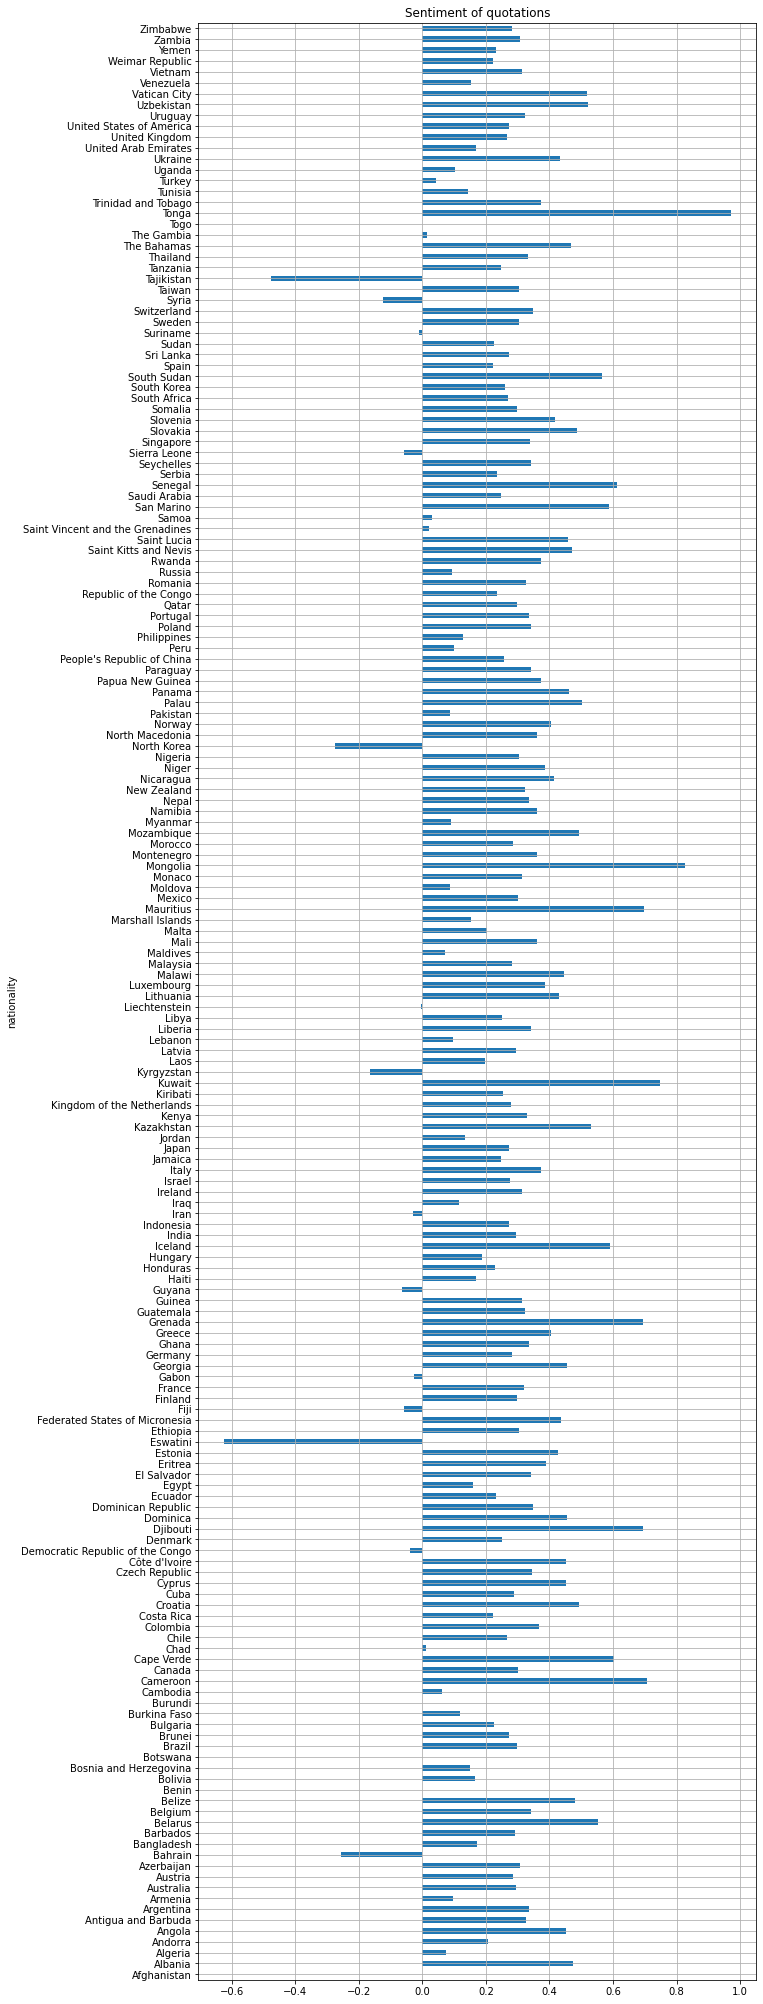

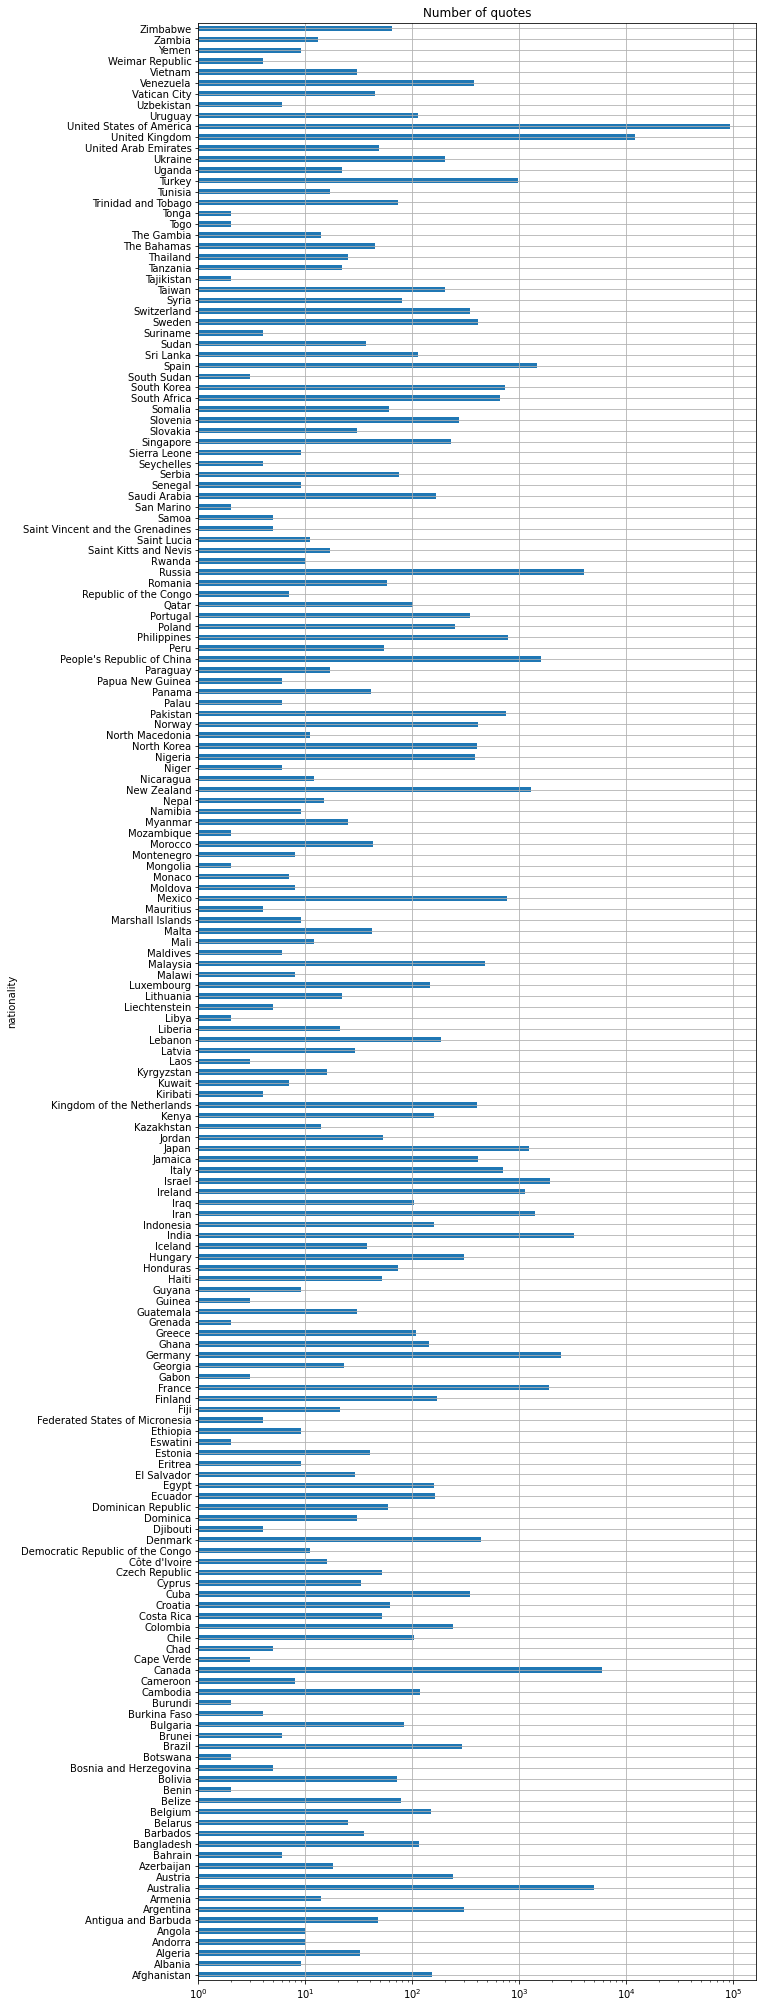

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 36))
plt.title("Sentiment of quotations")
#average sentiment for each country
US_love_mean = US_with_nation.groupby("nationality")["sentiment"].mean()
US_love_mean.plot.barh(grid=True)

plt.figure(figsize=(10,36))
plt.title("Number of quotes")
#count the number of quotes for each country
US_with_nation.groupby("nationality")["sentiment"].count().plot.barh(grid=True, log=True, align='center')


To make a brief analysis, in overall, most the countries seem at first sight more favorable to the USA.. Unsuprisingly the distribution of the number of quotes per country is highly non-uniform.

#### Map creation

In [9]:
import geopandas
#load world map dataframe
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#connect US_data with map dataframe
table = world.merge(US_love_mean, how="left", left_on=['name'], right_on=['nationality'])


# Clean data: remove rows with no data
table = table.dropna(subset=['sentiment'])

In [10]:
import folium

#create Map object to do the plot
my_map = folium.Map()

# Map parameters with as color foreach country its sentiment average
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['name', 'sentiment'],
    key_on='feature.properties.name',
    fill_color='RdYlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sentiment of Quotes',
    missing_kwds={'color': 'white'}
).add_to(my_map)

#Save Map figure
my_map.save('us_love.html')

## 6. Load PEW Research Center Dataset

In this section, the datasets provided by PEW research center are loaded and processed.
We extract the nationality, sex, age of the participants and also their answer to the question: "How much you like the
United States?"

In [11]:
!pip install pyreadstat

column_names = ['country', 'fav_us', 'sex', 'age']

#columns labels foreach year (have changed over time)
#"fav_US" denoting their negative or positive view (i.e. their "sentiments") towards the U.S.A.
columns = {2015: ['COUNTRY', 'Q12A', 'Q145', 'Q146'],
           2016: ['country', 'Q10A', 'q107', 'q108'],
           2017: ['Country', 'fav_US', 'sex', 'age'],
           2018: ['COUNTRY', 'fav_US', 'sex', 'age'],
           2019: ['country', 'FAV_US', 'SEX', 'AGE'],
           2020: ['country', 'fav_US', 'sex', 'age']}

pew = pd.DataFrame()

for year in range(2015, 2021):
    #create dataframe from PEW dataset
    pew_year = pd.read_spss("input/pew/{}.sav".format(year))
    pew_year_fav = pew_year[columns[year]]
    pew_year_fav.columns = column_names
    pew_year_fav['year'] = year
    #concat each year to one dataframe
    pew = pd.concat([pew, pew_year_fav], axis=0, ignore_index=True)

#Save the pew dataframe
pew.to_csv('input/pew.csv', index=False)


In [12]:
import pandas as pd
import numpy as np

pew = pd.read_csv('input/pew.csv')

#List of "invalid" answers in pew dataset
Nan_keywords = ['Refused', 'Don’t know', 'Don’t know (DO NOT READ)', 'Refused (DO NOT READ)',
       '(VOL) Refused', "(VOL)\xa0Don't know"]

pew = pew.replace(to_replace=Nan_keywords, value=np.NaN)

#map "sentiment" to float values
fav_dict = {'Somewhat favorable': 0.5, 'Very favorable':1,
       'Somewhat unfavorable':-0.5, 'Very unfavorable':-1}

pew = pew.replace(fav_dict)


pew.sample(n=5)


,country,fav_us,sex,age,year
172033,Spain,0.5,Male,44.0,2019
26046,Brazil,NaN,Female,48.0,2015
68827,South Africa,0.5,Male,30.0,2016
187212,Sweden,0.5,Male,53.0,2020
39182,China,0.5,Female,53.0,2015


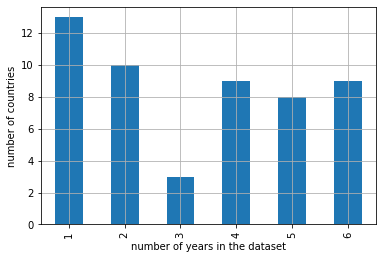

In [13]:
# foreach country, count the number of years it has appeared in the PEW yearly report
# then count the number of country who has appeared 1, 2, 3 times, etc...
pew.groupby('country')['year'].nunique().value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('number of years in the dataset')
plt.ylabel('number of countries')
plt.grid()



Unique Countries: 52


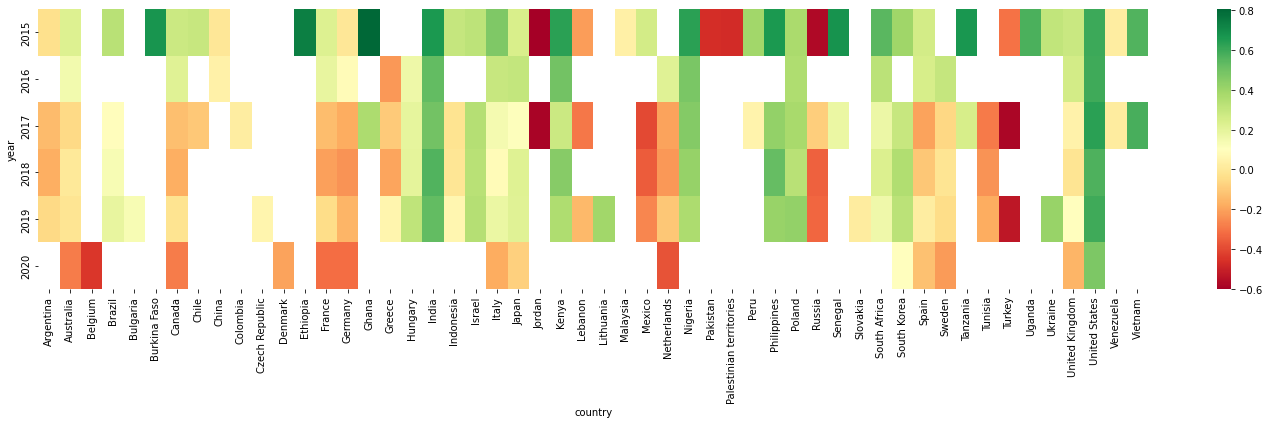

In [14]:
# heatmap for countries and years
import seaborn as sns
import matplotlib.pyplot as plt

pew_fav_us = pew.groupby(['country', 'year'], as_index=False)['fav_us'].mean()
pew_fav_pivot = pew_fav_us.pivot(index='year', columns='country', values='fav_us')
# pew_fav_pivot
plt.figure(figsize=(20,6))
sns.heatmap(pew_fav_pivot, cmap ='RdYlGn')
plt.tight_layout()
plt.savefig("output/pew_heatmap.jpg")
print("Unique Countries: {}".format(pew_fav_us.country.nunique()))

As we can see, there is few countries that have been analysed over all the years (only 9), and in total only around 50 countries appears in their reports.

### 7. Compare the datasets of PEW and QuoteSentiment

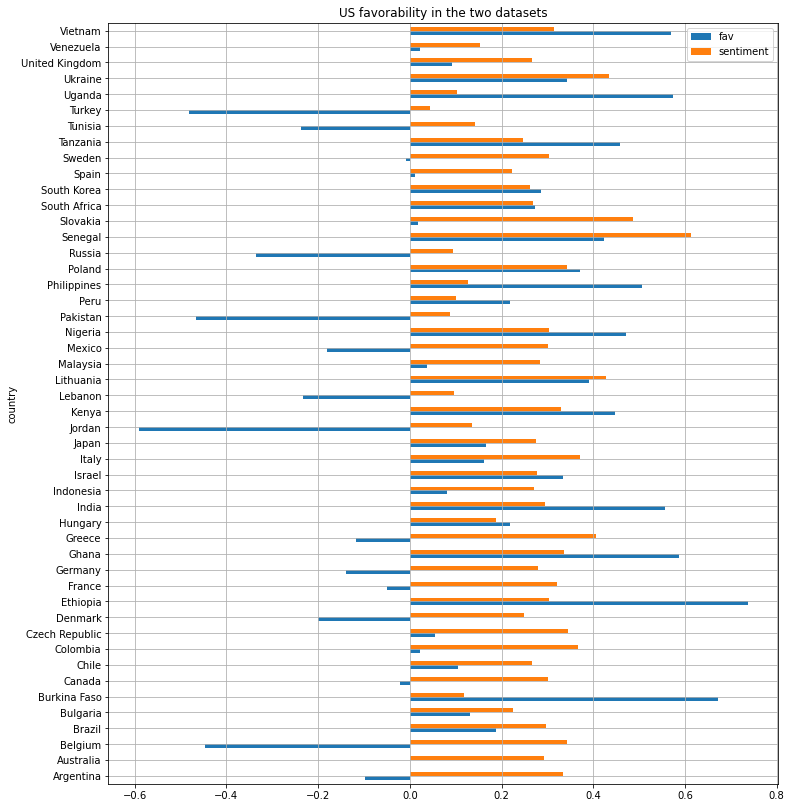

In [15]:
#Compute the mean sentiment for each country from the pew dataset report
pew_fav_us = pew.groupby('country')['fav_us'].mean().reset_index(name='fav')
quote_fav_us = US_love_mean.reset_index()
# merge the results of our sentiment analysis and the results of the pew dataset to create the plot
pew_quote_df = pd.merge(left=pew_fav_us, right=US_love_mean, left_on='country', right_on='nationality')

pew_quote_df.plot(x= 'country', figsize=(12,14), kind='barh')
plt.title("US favorability in the two datasets")
plt.grid()

It appears that there is a large difference between the quotations sentiment analysis we have made and the one made in the pew study. We should not forget that this first analysis was made over a small dataset containing just one year.

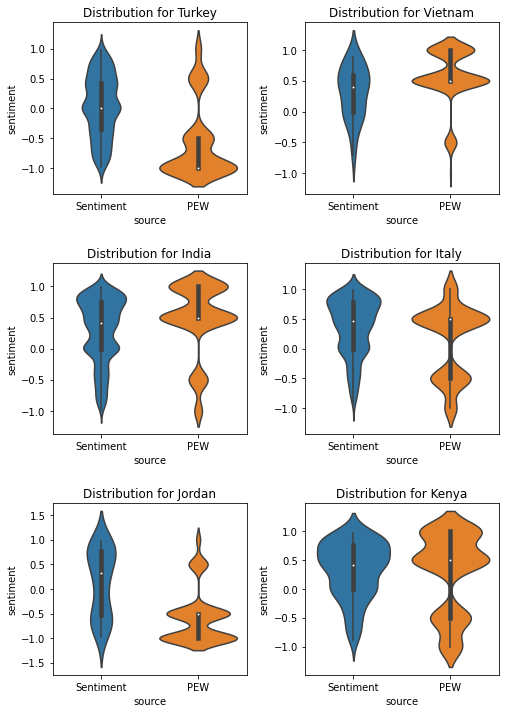

In [16]:
import seaborn as sns
US_with_nation["source"] = "Sentiment"
pew["source"] = "PEW"
pew = pew.rename(columns={'fav_us': 'sentiment'})
fig = plt.figure(figsize=(8,12))
for idx, country_name in enumerate(["Turkey", "Vietnam", "India", "Italy", "Jordan", "Kenya"]):
    country_sentiment = US_with_nation[US_with_nation.nationality==country_name][["sentiment", "source"]]
    country_pew = pew[(pew.year==2017) & (pew.country==country_name)][["sentiment", "source"]]
    plt.subplot(3,2,idx+1)
    plt.title("Distribution for {}".format(country_name))
    sns.violinplot(x="source", y="sentiment", data=pd.concat([country_sentiment, country_pew]))

plt.subplots_adjust(wspace=0.3, hspace=0.4)


In [13]:
US_with_nation["year"] = US_with_nation.date.dt.strftime('%Y')

In [22]:
country_list = ['Argentina', 'Australia', 'Brazil', 'Canada', 'France', 'Germany', 'Greece', 'Hungary', 'India',
                'Indonesia', 'Israel', 'Italy', 'Japan', 'Kenya', 'Lebanon', 'Mexico', 'Kingdom of the Netherlands', 'Nigeria',
                'Philippines', 'Poland', 'Russia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Turkey',
                'Ukraine', 'United Kingdom', 'United States of America']
from scipy import stats

for country in country_list:
    obama_cond = (US_with_nation["nationality"] == country) & ((US_with_nation["year"] == '2015') | (US_with_nation["year"] == '2016'))
    trump_cond = (US_with_nation["nationality"] == country) & ((US_with_nation["year"] == '2019') | (US_with_nation["year"] == '2020'))
    obama_sentiment = US_with_nation[obama_cond]["sentiment"]
    trump_sentiment = US_with_nation[trump_cond]["sentiment"]
    _, p_value = stats.ttest_ind(obama_sentiment,trump_sentiment,alternative='two-sided')
    print("Country : {},\tObama: {:.2f}\tTrump: {:.2f}".format(country, obama_sentiment.mean(), trump_sentiment.mean()))
    print("P value: {}\n".format(p_value))


Country : Argentina,	Obama: 0.40	Trump: 0.21
P value: 3.98398643332095e-08

Country : Australia,	Obama: 0.32	Trump: 0.27
P value: 2.7812998962077115e-07

Country : Brazil,	Obama: 0.35	Trump: 0.30
P value: 0.15326618657856966

Country : Canada,	Obama: 0.30	Trump: 0.29
P value: 0.08707762790082633

Country : France,	Obama: 0.34	Trump: 0.26
P value: 2.001647058675278e-06

Country : Germany,	Obama: 0.30	Trump: 0.25
P value: 0.0008167181680847943

Country : Greece,	Obama: 0.33	Trump: 0.38
P value: 0.41158051280954233

Country : Hungary,	Obama: 0.08	Trump: 0.16
P value: 0.1250054055836782

Country : India,	Obama: 0.34	Trump: 0.32
P value: 0.04790780138481843

Country : Indonesia,	Obama: 0.24	Trump: 0.27
P value: 0.6229069924148012

Country : Israel,	Obama: 0.25	Trump: 0.27
P value: 0.42841859649629754

Country : Italy,	Obama: 0.37	Trump: 0.29
P value: 0.0026162689584306106

Country : Japan,	Obama: 0.28	Trump: 0.26
P value: 0.31117024320659503

Country : Kenya,	Obama: 0.32	Trump: 0.25
P value

In [76]:
print("Total: {}\nPositive: {}\nNegative: {}".format(
    len(US_with_nation),
    len(US_with_nation[US_with_nation.sentiment > 0]),
    len(US_with_nation[US_with_nation.sentiment <= 0])
))

from sklearn.preprocessing import scale
US_with_nation["sentiment_normalized"] = scale(US_with_nation.sentiment)

print("\n** Normalized **\nTotal: {}\nPositive: {}\nNegative: {}".format(
    len(US_with_nation),
    len(US_with_nation[US_with_nation.sentiment_normalized > 0]),
    len(US_with_nation[US_with_nation.sentiment_normalized <= 0])
))


Total: 186855
Positive: 121364
Negative: 65491
Total: 186855
Positive: 105790
Negative: 81065


In [22]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
US_with_nation["sentences"] = US_with_nation.quotation.apply(lambda x: sent_tokenize(x))
US_with_nation.head()

[nltk_data] Downloading package punkt to /home/alireza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_id,id,nationality,sentiment,source,sentences
0,2017-11-24-051791,I've handled so many of my own cases and that ...,Sal LaBarbera,[Q17087375],2017-11-24 14:40:40,1,"[[Sal LaBarbera, 0.9443], [None, 0.0505], [Zod...",[http://torontosun.com/news/world/is-this-man-...,E,Q17087375,Q17087375,NaN,0.8151,Sentiment,[I've handled so many of my own cases and that...
1,2017-12-26-000257,[ t ] he contracting systems at CUNY and SUNY ...,Andrew Cuomo,[Q11673],2017-12-26 14:16:22,1,"[[Andrew Cuomo, 0.8492], [None, 0.1508]]",[http://gothamgazette.com/state/7353-with-phas...,E,Q11673,Q11673,United States of America,0.2732,Sentiment,[[ t ] he contracting systems at CUNY and SUNY...
2,2017-09-07-130567,This is a vital and critical project for the e...,Andrew Cuomo,[Q11673],2017-09-07 15:39:52,4,"[[Andrew Cuomo, 0.5692], [None, 0.2948], [Pres...",[http://lohud.com/story/news/politics/politics...,E,Q11673,Q11673,United States of America,0.3818,Sentiment,[This is a vital and critical project for the ...
3,2017-11-01-112292,"The evidence shows -- and again, it's only sev...",Andrew Cuomo,[Q11673],2017-11-01 07:32:24,75,"[[Andrew Cuomo, 0.9055], [None, 0.0886], [John...",[http://rss.cnn.com/~r/rss/cnn_us/~3/34VO1G_Wy...,E,Q11673,Q11673,United States of America,0.5719,Sentiment,"[The evidence shows -- and again, it's only se..."
4,2017-12-06-142925,This state spends more per pupil on education ...,Andrew Cuomo,[Q11673],2017-12-06 11:00:00,1,"[[Andrew Cuomo, 0.9346], [None, 0.0654]]",[http://www.suncommunitynews.com/articles/the-...,E,Q11673,Q11673,United States of America,0.7096,Sentiment,[This state spends more per pupil on education...


In [24]:
US_with_nation["token_sentences"] = US_with_nation.sentences.apply(lambda  x: [word_tokenize(sentence) for sentence in x])
US_with_nation.head()



,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_id,id,nationality,sentiment,source,sentences,token_sentences
0,2017-11-24-051791,I've handled so many of my own cases and that ...,Sal LaBarbera,[Q17087375],2017-11-24 14:40:40,1,"[[Sal LaBarbera, 0.9443], [None, 0.0505], [Zod...",[http://torontosun.com/news/world/is-this-man-...,E,Q17087375,Q17087375,NaN,0.8151,Sentiment,[I've handled so many of my own cases and that...,"[[I, 've, handled, so, many, of, my, own, case..."
1,2017-12-26-000257,[ t ] he contracting systems at CUNY and SUNY ...,Andrew Cuomo,[Q11673],2017-12-26 14:16:22,1,"[[Andrew Cuomo, 0.8492], [None, 0.1508]]",[http://gothamgazette.com/state/7353-with-phas...,E,Q11673,Q11673,United States of America,0.2732,Sentiment,[[ t ] he contracting systems at CUNY and SUNY...,"[[[, t, ], he, contracting, systems, at, CUNY,..."
2,2017-09-07-130567,This is a vital and critical project for the e...,Andrew Cuomo,[Q11673],2017-09-07 15:39:52,4,"[[Andrew Cuomo, 0.5692], [None, 0.2948], [Pres...",[http://lohud.com/story/news/politics/politics...,E,Q11673,Q11673,United States of America,0.3818,Sentiment,[This is a vital and critical project for the ...,"[[This, is, a, vital, and, critical, project, ..."
3,2017-11-01-112292,"The evidence shows -- and again, it's only sev...",Andrew Cuomo,[Q11673],2017-11-01 07:32:24,75,"[[Andrew Cuomo, 0.9055], [None, 0.0886], [John...",[http://rss.cnn.com/~r/rss/cnn_us/~3/34VO1G_Wy...,E,Q11673,Q11673,United States of America,0.5719,Sentiment,"[The evidence shows -- and again, it's only se...","[[The, evidence, shows, --, and, again, ,, it,..."
4,2017-12-06-142925,This state spends more per pupil on education ...,Andrew Cuomo,[Q11673],2017-12-06 11:00:00,1,"[[Andrew Cuomo, 0.9346], [None, 0.0654]]",[http://www.suncommunitynews.com/articles/the-...,E,Q11673,Q11673,United States of America,0.7096,Sentiment,[This state spends more per pupil on education...,"[[This, state, spends, more, per, pupil, on, e..."


In [60]:
from nltk.corpus import stopwords
from itertools import chain
nltk.download('stopwords')

US_keywords = ["US ", "U.S", "USA", "United States", "us", "usa", "united", "states", "america"]
my_stopwords = stopwords.words('english') + US_keywords
US_with_nation["tokens"] = US_with_nation.token_sentences.apply(lambda sentences: list(chain.from_iterable(sentences)))
US_with_nation["tokens"] = US_with_nation.tokens.apply(lambda tokens: [token.lower() for token in tokens if token.isalpha()
                                                    and token.lower() not in my_stopwords and len(token)>1] )
US_with_nation.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alireza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_id,id,nationality,sentiment,source,sentences,token_sentences,POS_tokens,tokens
0,2017-11-24-051791,I've handled so many of my own cases and that ...,Sal LaBarbera,[Q17087375],2017-11-24 14:40:40,1,"[[Sal LaBarbera, 0.9443], [None, 0.0505], [Zod...",[http://torontosun.com/news/world/is-this-man-...,E,Q17087375,Q17087375,NaN,0.8151,Sentiment,[I've handled so many of my own cases and that...,"[[I, 've, handled, so, many, of, my, own, case...","[[(I, PRP), ('ve, VBP), (handled, VBN), (so, R...","[handled, many, cases, kind, problem, always, ..."
1,2017-12-26-000257,[ t ] he contracting systems at CUNY and SUNY ...,Andrew Cuomo,[Q11673],2017-12-26 14:16:22,1,"[[Andrew Cuomo, 0.8492], [None, 0.1508]]",[http://gothamgazette.com/state/7353-with-phas...,E,Q11673,Q11673,United States of America,0.2732,Sentiment,[[ t ] he contracting systems at CUNY and SUNY...,"[[[, t, ], he, contracting, systems, at, CUNY,...","[[([, JJ), (t, NN), (], NN), (he, PRP), (contr...","[contracting, systems, cuny, suny, become, foc..."
2,2017-09-07-130567,This is a vital and critical project for the e...,Andrew Cuomo,[Q11673],2017-09-07 15:39:52,4,"[[Andrew Cuomo, 0.5692], [None, 0.2948], [Pres...",[http://lohud.com/story/news/politics/politics...,E,Q11673,Q11673,United States of America,0.3818,Sentiment,[This is a vital and critical project for the ...,"[[This, is, a, vital, and, critical, project, ...","[[(This, DT), (is, VBZ), (a, DT), (vital, JJ),...","[vital, critical, project, entire, northeast, ..."
3,2017-11-01-112292,"The evidence shows -- and again, it's only sev...",Andrew Cuomo,[Q11673],2017-11-01 07:32:24,75,"[[Andrew Cuomo, 0.9055], [None, 0.0886], [John...",[http://rss.cnn.com/~r/rss/cnn_us/~3/34VO1G_Wy...,E,Q11673,Q11673,United States of America,0.5719,Sentiment,"[The evidence shows -- and again, it's only se...","[[The, evidence, shows, --, and, again, ,, it,...","[[(The, DT), (evidence, NN), (shows, NNS), (--...","[evidence, shows, several, hours, investigatio..."
4,2017-12-06-142925,This state spends more per pupil on education ...,Andrew Cuomo,[Q11673],2017-12-06 11:00:00,1,"[[Andrew Cuomo, 0.9346], [None, 0.0654]]",[http://www.suncommunitynews.com/articles/the-...,E,Q11673,Q11673,United States of America,0.7096,Sentiment,[This state spends more per pupil on education...,"[[This, state, spends, more, per, pupil, on, e...","[[(This, DT), (state, NN), (spends, VBZ), (mor...","[state, spends, per, pupil, education, state, ..."


In [82]:
from gensim import corpora
tokens = US_with_nation[US_with_nation.sentiment<=0].tokens.tolist()
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]
# print(corpus)


In [83]:
from gensim import models
num_topics = 40
lda_model = models.LdaModel(corpus, num_topics=num_topics,
                            id2word=dictionary_LDA,
                            alpha='auto',
                            eta='auto',
                            passes=4)


In [89]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.118*"north" + 0.097*"korea" + 0.080*"nuclear" + 0.066*"south" + 0.056*"threat" + 0.028*"korean" + 0.022*"missile" + 0.022*"weapons" + 0.021*"allies" + 0.019*"fire" + 0.018*"threats" + 0.017*"military" + 0.017*"would" + 0.015*"account" + 0.012*"destroy" + 0.012*"degree" + 0.012*"could" + 0.012*"defend" + 0.012*"consider" + 0.011*"china"

1: 0.111*"years" + 0.110*"many" + 0.035*"especially" + 0.031*"three" + 0.030*"lives" + 0.029*"life" + 0.028*"side" + 0.027*"five" + 0.025*"policies" + 0.023*"across" + 0.023*"lost" + 0.019*"living" + 0.017*"cities" + 0.017*"families" + 0.016*"needed" + 0.016*"sent" + 0.015*"stand" + 0.015*"last" + 0.014*"throughout" + 0.014*"return"

2: 0.074*"part" + 0.048*"media" + 0.044*"given" + 0.042*"information" + 0.041*"news" + 0.039*"find" + 0.038*"times" + 0.031*"wanted" + 0.030*"evidence" + 0.029*"recent" + 0.028*"campaign" + 0.023*"away" + 0.023*"talk" + 0.020*"later" + 0.020*"disease" + 0.019*"decades" + 0.019*"organization" + 0.018*"effect" + 0.018*"w

In [85]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.save_html(LDAvis_prepared, 'output/ldavis_prepared_'+ str(num_topics) +'neg.html')
LDAvis_prepared


/home/alireza/EPFL/ADA2021/env/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
23    -0.119396  0.254836       1        1  6.338210
35    -0.049118  0.111995       2        1  4.008124
24     0.141214  0.006768       3        1  3.995179
11     0.009594 -0.019122       4        1  3.103953
19    -0.141680  0.053953       5        1  3.036480
37    -0.102840 -0.181937       6        1  2.999633
13     0.007183  0.087763       7        1  2.897707
17     0.056098 -0.065100       8        1  2.830673
10     0.141359  0.066749       9        1  2.827552
0     -0.183884 -0.098802      10        1  2.781163
7      0.130064  0.117653      11        1  2.730352
6     -0.020451 -0.037927      12        1  2.704729
1      0.081123  0.119486      13        1  2.439326
22    -0.057066  0.082118      14        1  2.428136
15     0.006917 -0.001601      15        1  2.427612
4     -0.127004  0.094011      16        1  2.406368
27     0.073482  0.129050      17        1  2.361167
5      0.105293 -0.060492      18        1  2.356009
28    -0.188668  0.081515      19        1  2.311549
14    -0.091600 -0.085959      20        1  2.267670
21     0.135518  0.027203      21        1  2.263086
29     0.059804 -0.013142      22        1  2.249383
8      0.027736  0.027832      23        1  2.184974
26    -0.041706  0.022145      24        1  2.178934
20    -0.073191  0.039213      25        1  2.163048
25     0.024809 -0.001081      26        1  2.149367
18    -0.039570 -0.103536      27        1  2.144909
2     -0.026363 -0.001424      28        1  2.141497
30     0.050212 -0.013163      29        1  2.141448
36     0.012623 -0.084011      30        1  2.056351
32    -0.102760 -0.066890      31        1  2.031921
31    -0.014575 -0.087683      32        1  2.010117
33     0.073138 -0.019556      33        1  2.000985
9      0.062455  0.046136      34        1  1.992810
34     0.073968 -0.107299      35        1  1.990822
12     0.020535 -0.058481      36        1  1.988122
38     0.037062 -0.092184      37        1  1.956700
39     0.064536 -0.026788      38        1  1.858763
3      0.044192 -0.108677      39        1  1.834479
16    -0.059042 -0.033568      40        1  1.410694, topic_info=           Term         Freq        Total Category  logprob  loglift
31    president  6991.000000  6991.000000  Default  30.0000  30.0000
34        trump  6143.000000  6143.000000  Default  29.0000  29.0000
107         war  4306.000000  4306.000000  Default  28.0000  28.0000
411       world  4501.000000  4501.000000  Default  27.0000  27.0000
64          new  3723.000000  3723.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1632   michigan   130.744936   131.964408  Topic40  -4.6933   4.2518
1229    dispute   147.155760   151.493455  Topic40  -4.5751   4.2320
1524    seeking   213.351845   248.423937  Topic40  -4.2036   4.1089
662    southern   219.633017   261.732276  Topic40  -4.1746   4.0857
127       would   162.858617  6805.850242  Topic40  -4.4737   0.5284

[1570 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1866     10  0.985420     abandon
532      11  0.998420        able
2454      2  0.996330      abroad
5450     10  0.994633     absence
2819     19  0.996736  absolutely
...     ...       ...         ...
2701     30  0.020277         yet
2701     34  0.959796         yet
69       18  0.997546        york
3643     16  0.997181       young
3535     18  0.994093     zealand

[2419 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[24, 36, 25, 12, 20, 38, 14, 18, 11, 1, 8, 7, 2, 23, 16, 5, 28, 6, 29, 15, 22, 30, 9, 27, 21, 26, 19, 3, 31, 37, 33, 32, 34, 10, 35, 13, 39, 40, 4, 17])

In [87]:
topic_table = LDAvis_prepared.token_table
topic_table[topic_table["Term"] == "iran"]

,Topic,Freq,Term
term,,,
415,36,0.998217,iran


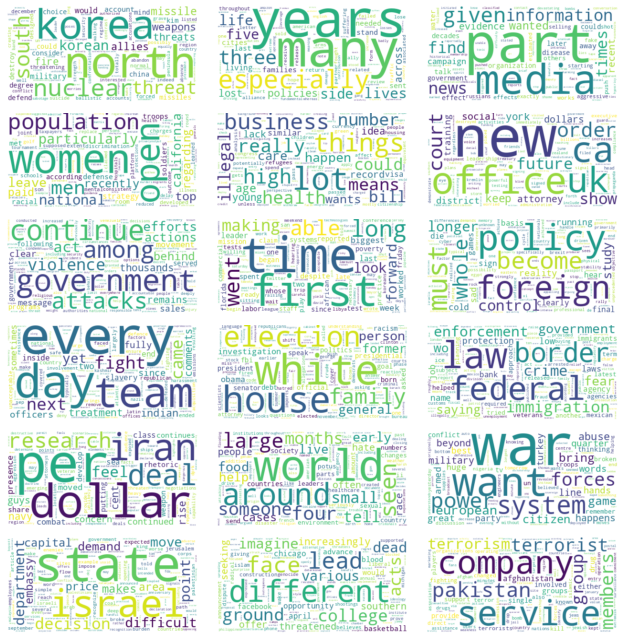

In [99]:
from wordcloud import WordCloud

fig = plt.figure(figsize=(9,9))
for i in range(18):
    plt.subplot(6,3,i+1)
    plt.imshow(WordCloud(background_color="white").fit_words(dict(lda_model.show_topic(i, 200))),
               interpolation='bilinear')
    plt.axis("off")
plt.tight_layout()
plt.show()

